In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text

In [2]:
config_to_text = {
    'centernet-update_r50-caffe_fpn_ms-1x_coco_centernet-update_r50-caffe_fpn_ms-1x_coco.csv': 'CenterNet R50',
    'centernet-update_r50-caffe_fpn_ms-1x_coco.py': 'CenterNet R50',
    'conditional-detr_r50_8xb2-50e_coco_conditional-detr_r50_8xb2-50e_coco.csv': 'Cond. DETR R50',
    'dab-detr_r50_8xb2-50e_coco_dab-detr_r50_8xb2-50e_coco.csv': 'DAB DETR R50',
    'deformable-detr_r50_16xb2-50e_coco_deformable-detr_r50_16xb2-50e_coco.csv': 'Deformable DETR R50',
    'deformable-detr-refine-twostage_r50_16xb2-50e_coco_deformable-detr-refine-twostage_r50_16xb2-50e_coco.csv': 'Deformable DETR R50 (2 stages)',
    'detr_r50_8xb2-150e_coco_detr_r50_8xb2-150e_coco.csv': 'DETR R50',
    'dino-4scale_r50_improved_8xb2-12e_coco_dino-4scale_r50_improved_8xb2-12e_coco.csv': 'DINO-4 R50',
    'dino-5scale_swin-l_8xb2-36e_coco_dino-5scale_swin-l_8xb2-36e_coco.csv': 'DINO-5 Swin',
    'faster-rcnn_x101-64x4d_fpn_ms-3x_coco_faster-rcnn_x101-64x4d_fpn_ms-3x_coco.csv': 'Faster R-CNN Swin',
    'cascade-mask-rcnn_r101_fpn_ms-3x_coco_cascade-mask-rcnn_r101_fpn_ms-3x_coco.csv': 'Mask R-CNN R101',
    'cascade-mask-rcnn_r101_fpn_ms-3x_coco.py': 'Mask R-CNN R101',
    'cascade-mask-rcnn_r50_fpn_1x_coco_cascade-mask-rcnn_r50_fpn_1x_coco.csv': 'Mask R-CNN R50',
    'cascade-mask-rcnn_r50_fpn_1x_coco.py': 'Mask R-CNN R50',
    'mask-rcnn_swin-t-p4-w7_fpn_1x_coco_mask-rcnn_swin-t-p4-w7_fpn_1x_coco.csv': 'Mask R-CNN Swin',
    'mask-rcnn_swin-t-p4-w7_fpn_1x_coco.py': 'Mask R-CNN Swin',
    'mask-rcnn_swin-t-p4-w7_fpn_ms-crop-3x_coco.py': 'Mask R-CNN Swin',
    'mask-rcnn_swin-t-p4-w7_fpn_ms-crop-3x_coco_mask-rcnn_swin-t-p4-w7_fpn_ms-crop-3x_coco.csv': 'Mask R-CNN Swin (Crop)',
    'cascade-mask-rcnn_x101-64x4d_fpn_ms-3x_coco_cascade-mask-rcnn_x101-64x4d_fpn_ms-3x_coco.csv': 'Mask R-CNN X101',
    'cascade-rpn_faster-rcnn_r50-caffe_fpn_1x_coco_cascade-rpn_faster-rcnn_r50-caffe_fpn_1x_coco.csv': 'Faster R-CNN R50',
    'cascade-rpn_faster-rcnn_r50-caffe_fpn_1x_coco.py': 'Faster R-CNN R50',
    'cascade-mask-rcnn_x101-64x4d_fpn_ms-3x_coco.py': 'Mask R-CNN X101',
    'faster-rcnn_x101-64x4d_fpn_ms-3x_coco.py': 'Faster R-CNN X101',
    'retinanet_effb3_fpn_8xb4-crop896-1x_coco_retinanet_effb3_fpn_8xb4-crop896-1x_coco.csv': 'RetinaNet',
    'retinanet_effb3_fpn_8xb4-crop896-1x_coco.py': 'RetinaNet',
    'rtmdet-ins_m_8xb32-300e_coco_rtmdet-ins_m_8xb32-300e_coco.csv': 'RTMDet-ins m',
    'rtmdet-ins_m_8xb32-300e_coco.py': 'RTMDet-ins m',
    'rtmdet-ins_tiny_8xb32-300e_coco_rtmdet-ins_tiny_8xb32-300e_coco.csv': 'RTMDet-ins tiny',
    'rtmdet-ins_tiny_8xb32-300e_coco.py': 'RTMDet-ins tiny',
    'rtmdet_x_8xb32-300e_coco_rtmdet_x_8xb32-300e_coco.csv': 'RTMDet-x',
    'rtmdet_x_8xb32-300e_coco.py': 'RTMDet-x',
    'yolof_r50-c5_8xb8-1x_coco_yolof_r50-c5_8xb8-1x_coco.csv': 'YOLOf R50',
    'yolof_r50-c5_8xb8-1x_coco.py': 'YOLOf R50',
    'yolov3_d53_8xb8-320-273e_coco_yolov3_d53_8xb8-320-273e_coco.csv': 'YOLOv3 d53',
    'yolov3_d53_8xb8-320-273e_coco.py': 'YOLOv3 d53',
    'yolov3_mobilenetv2_8xb24-320-300e_coco.py': 'YOLOv3 MobileNetV2',
    'yolox_l_8xb8-300e_coco_yolox_l_8xb8-300e_coco.csv': 'YOLOX-l',
    'yolox_l_8xb8-300e_coco.py': 'YOLOX-l',
    'yolox_s_8xb8-300e_coco_yolox_s_8xb8-300e_coco.csv': 'YOLOX-s',
    'yolox_s_8xb8-300e_coco.py': 'YOLOX-s',
    'yolox_tiny_8xb8-300e_coco_yolox_tiny_8xb8-300e_coco.csv': 'YOLOX-tiny',
    'yolox_tiny_8xb8-300e_coco.py': 'YOLOX-tiny',
    'yolox_x_8xb8-300e_coco_yolox_x_8xb8-300e_coco.csv': 'YOLOX-x',
    'yolox_x_8xb8-300e_coco.py': 'YOLOX-x',
    'vitdet.py': 'ViTDet',
    'rtmdet.py': 'RTMDet',
    'detr.py': 'DETR',
}

In [3]:
result_dir = pathlib.Path('results')
result_paths = {gpu.name: list(gpu.iterdir()) for gpu in result_dir.iterdir()}

print({(k, len(v)) for k, v in result_paths.items()})

{('Quadro_RTX-8000', 26), ('RTX-3080Ti', 26), ('TitanX', 26), ('A6000', 26), ('Jetson', 0), ('RTX-4090', 29)}


0    0.444
Name: mAP, dtype: float64


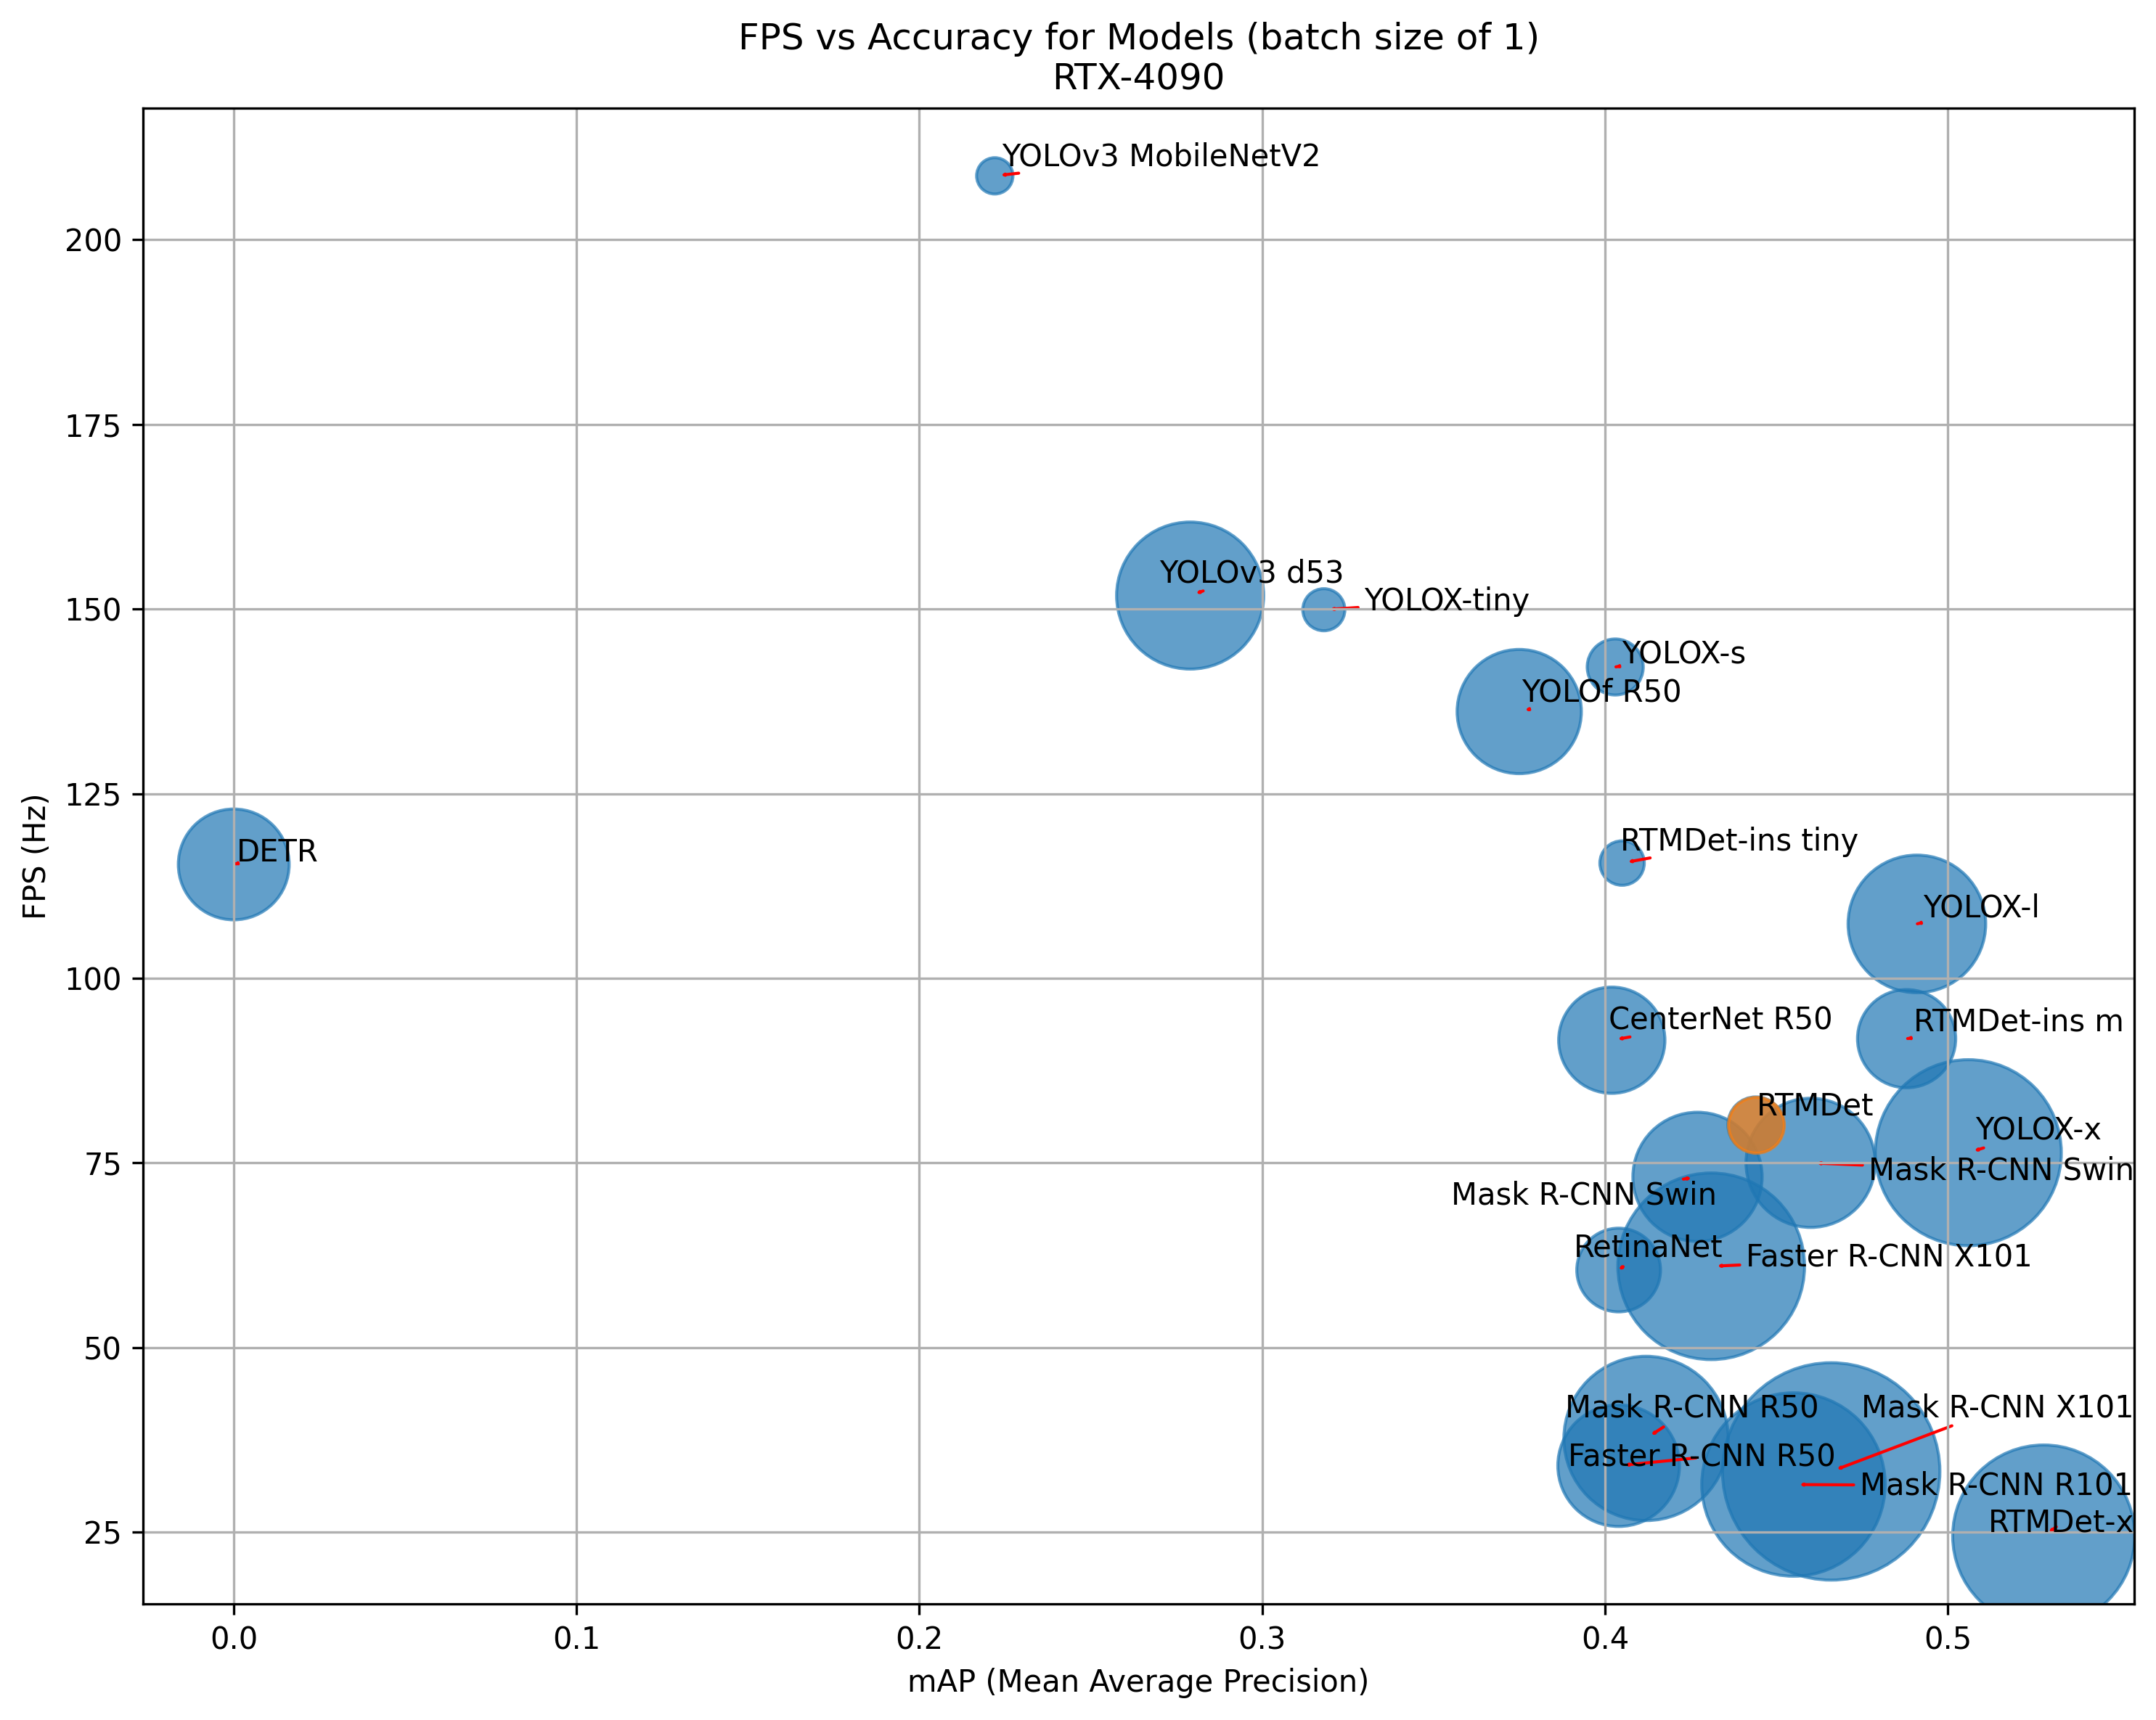

0    0.444
Name: mAP, dtype: float64


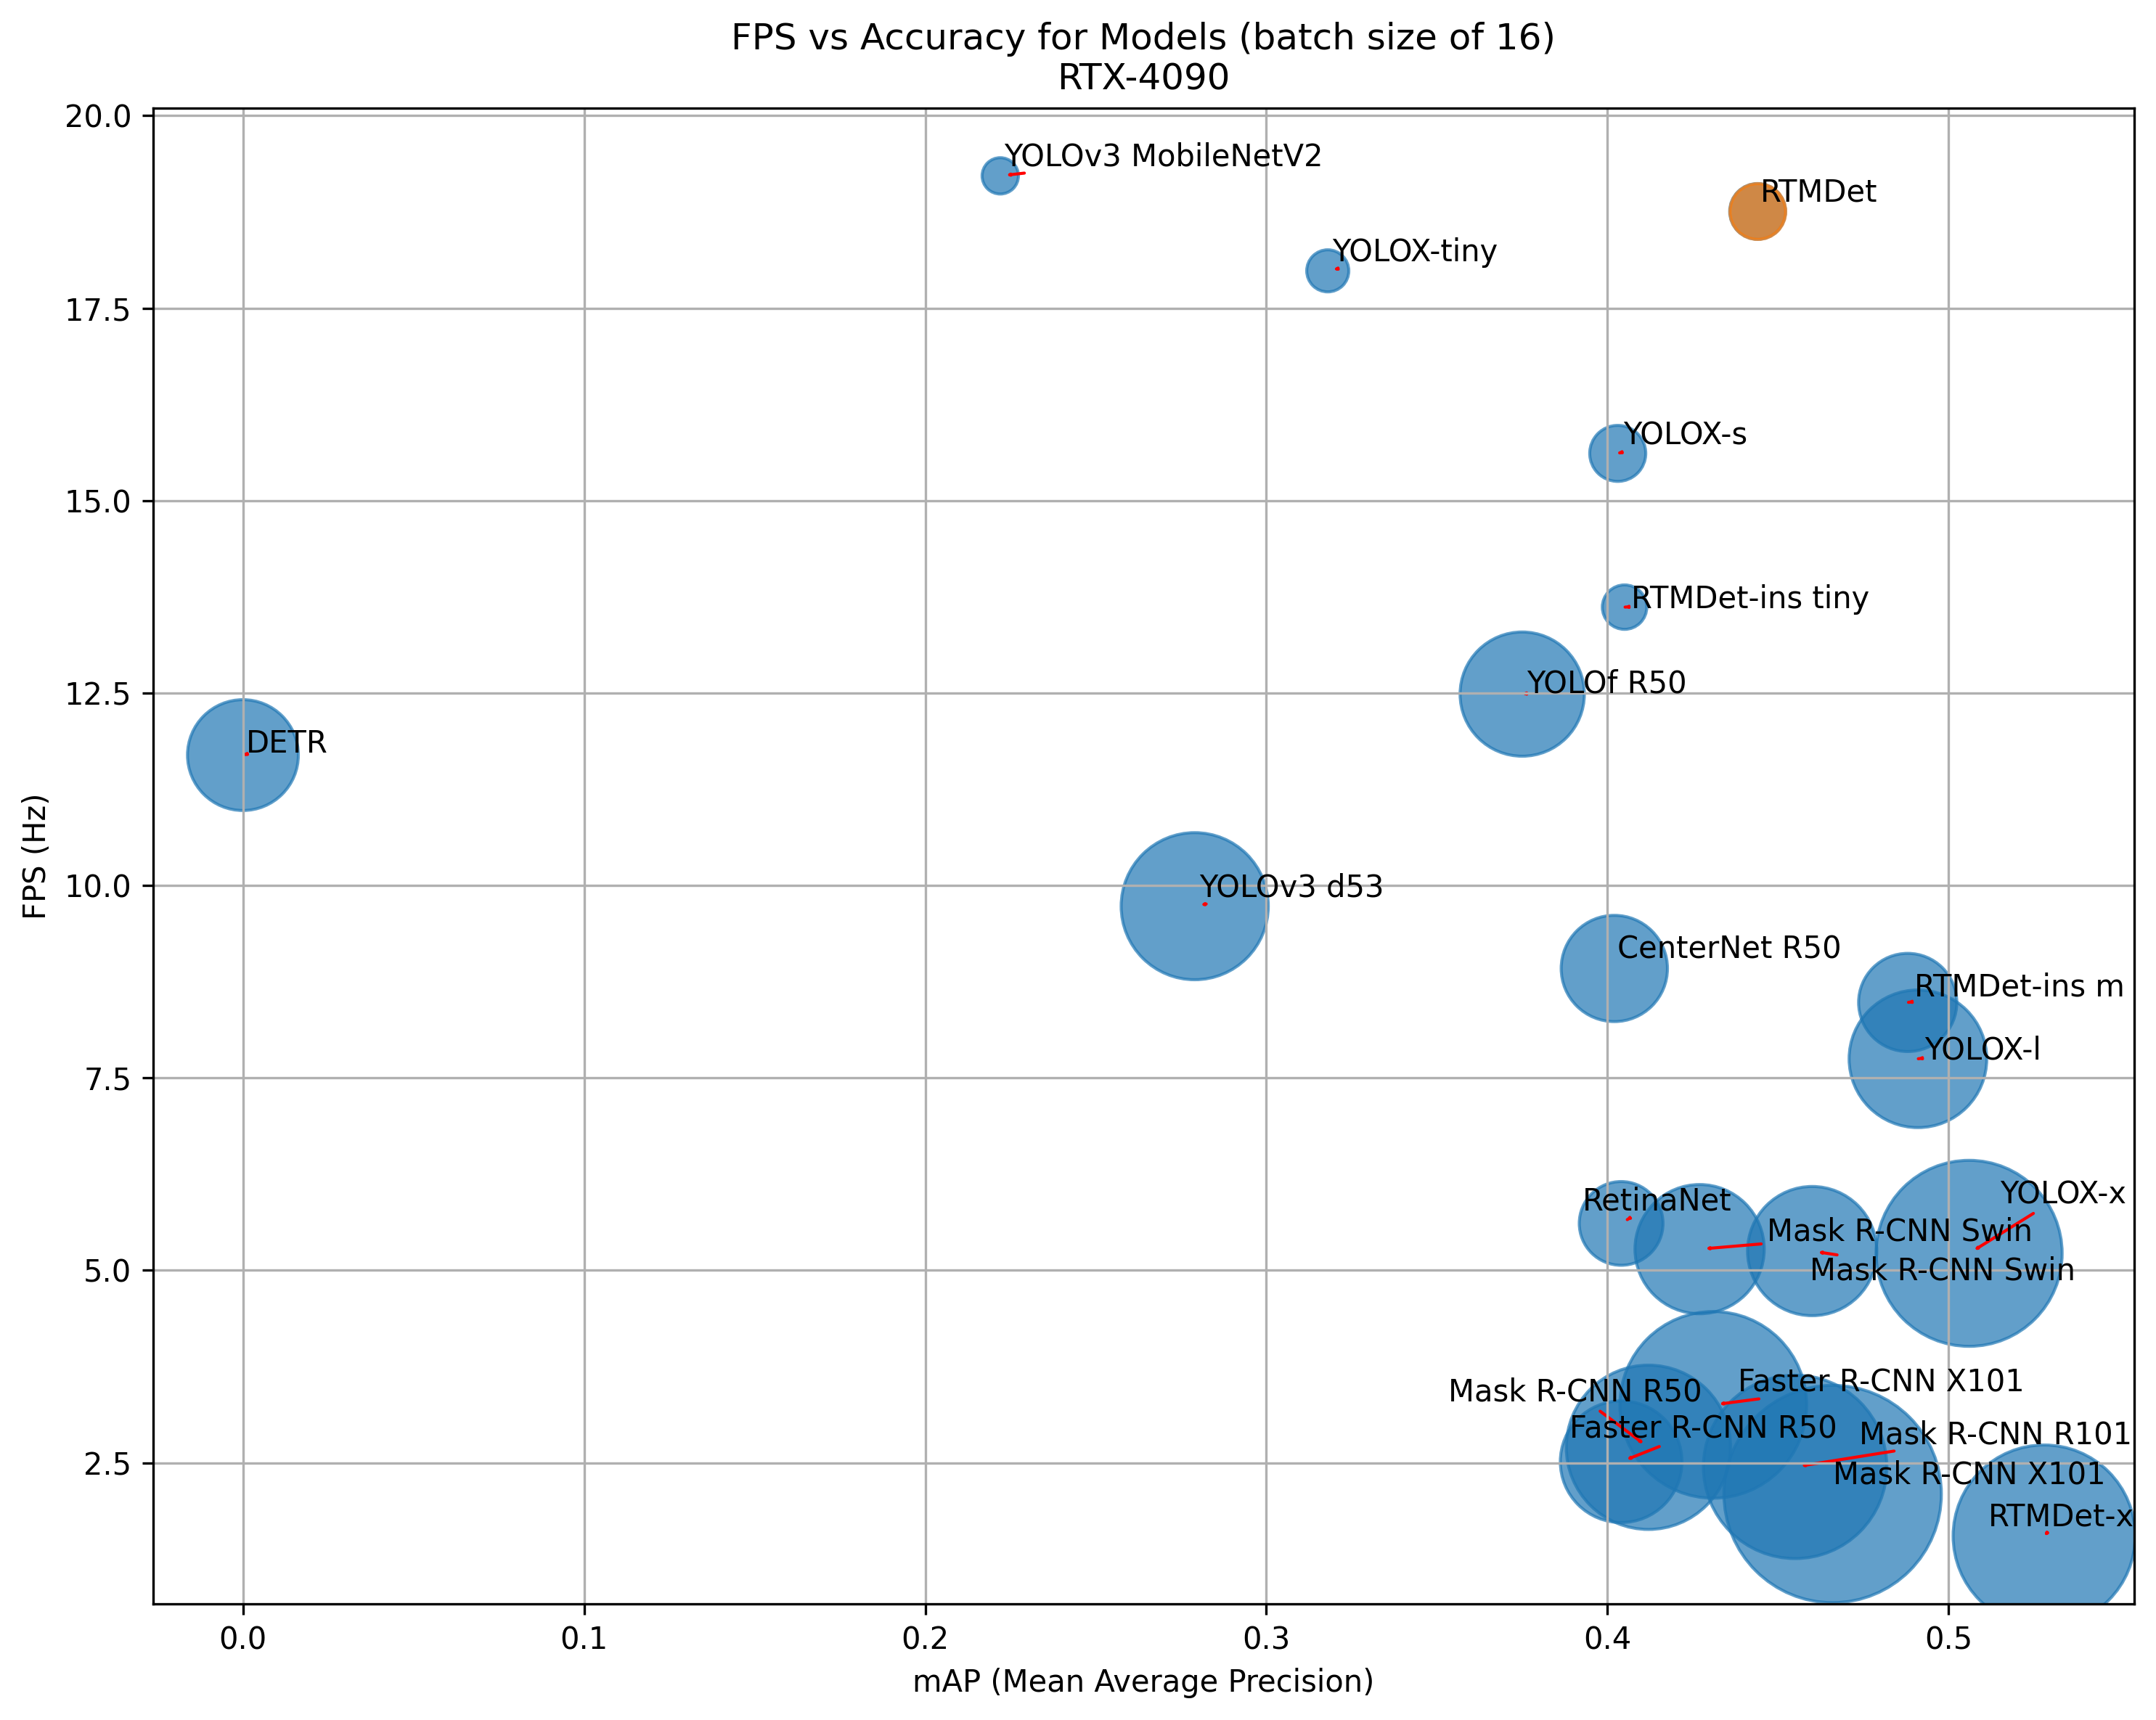

0    0.444
Name: mAP, dtype: float64


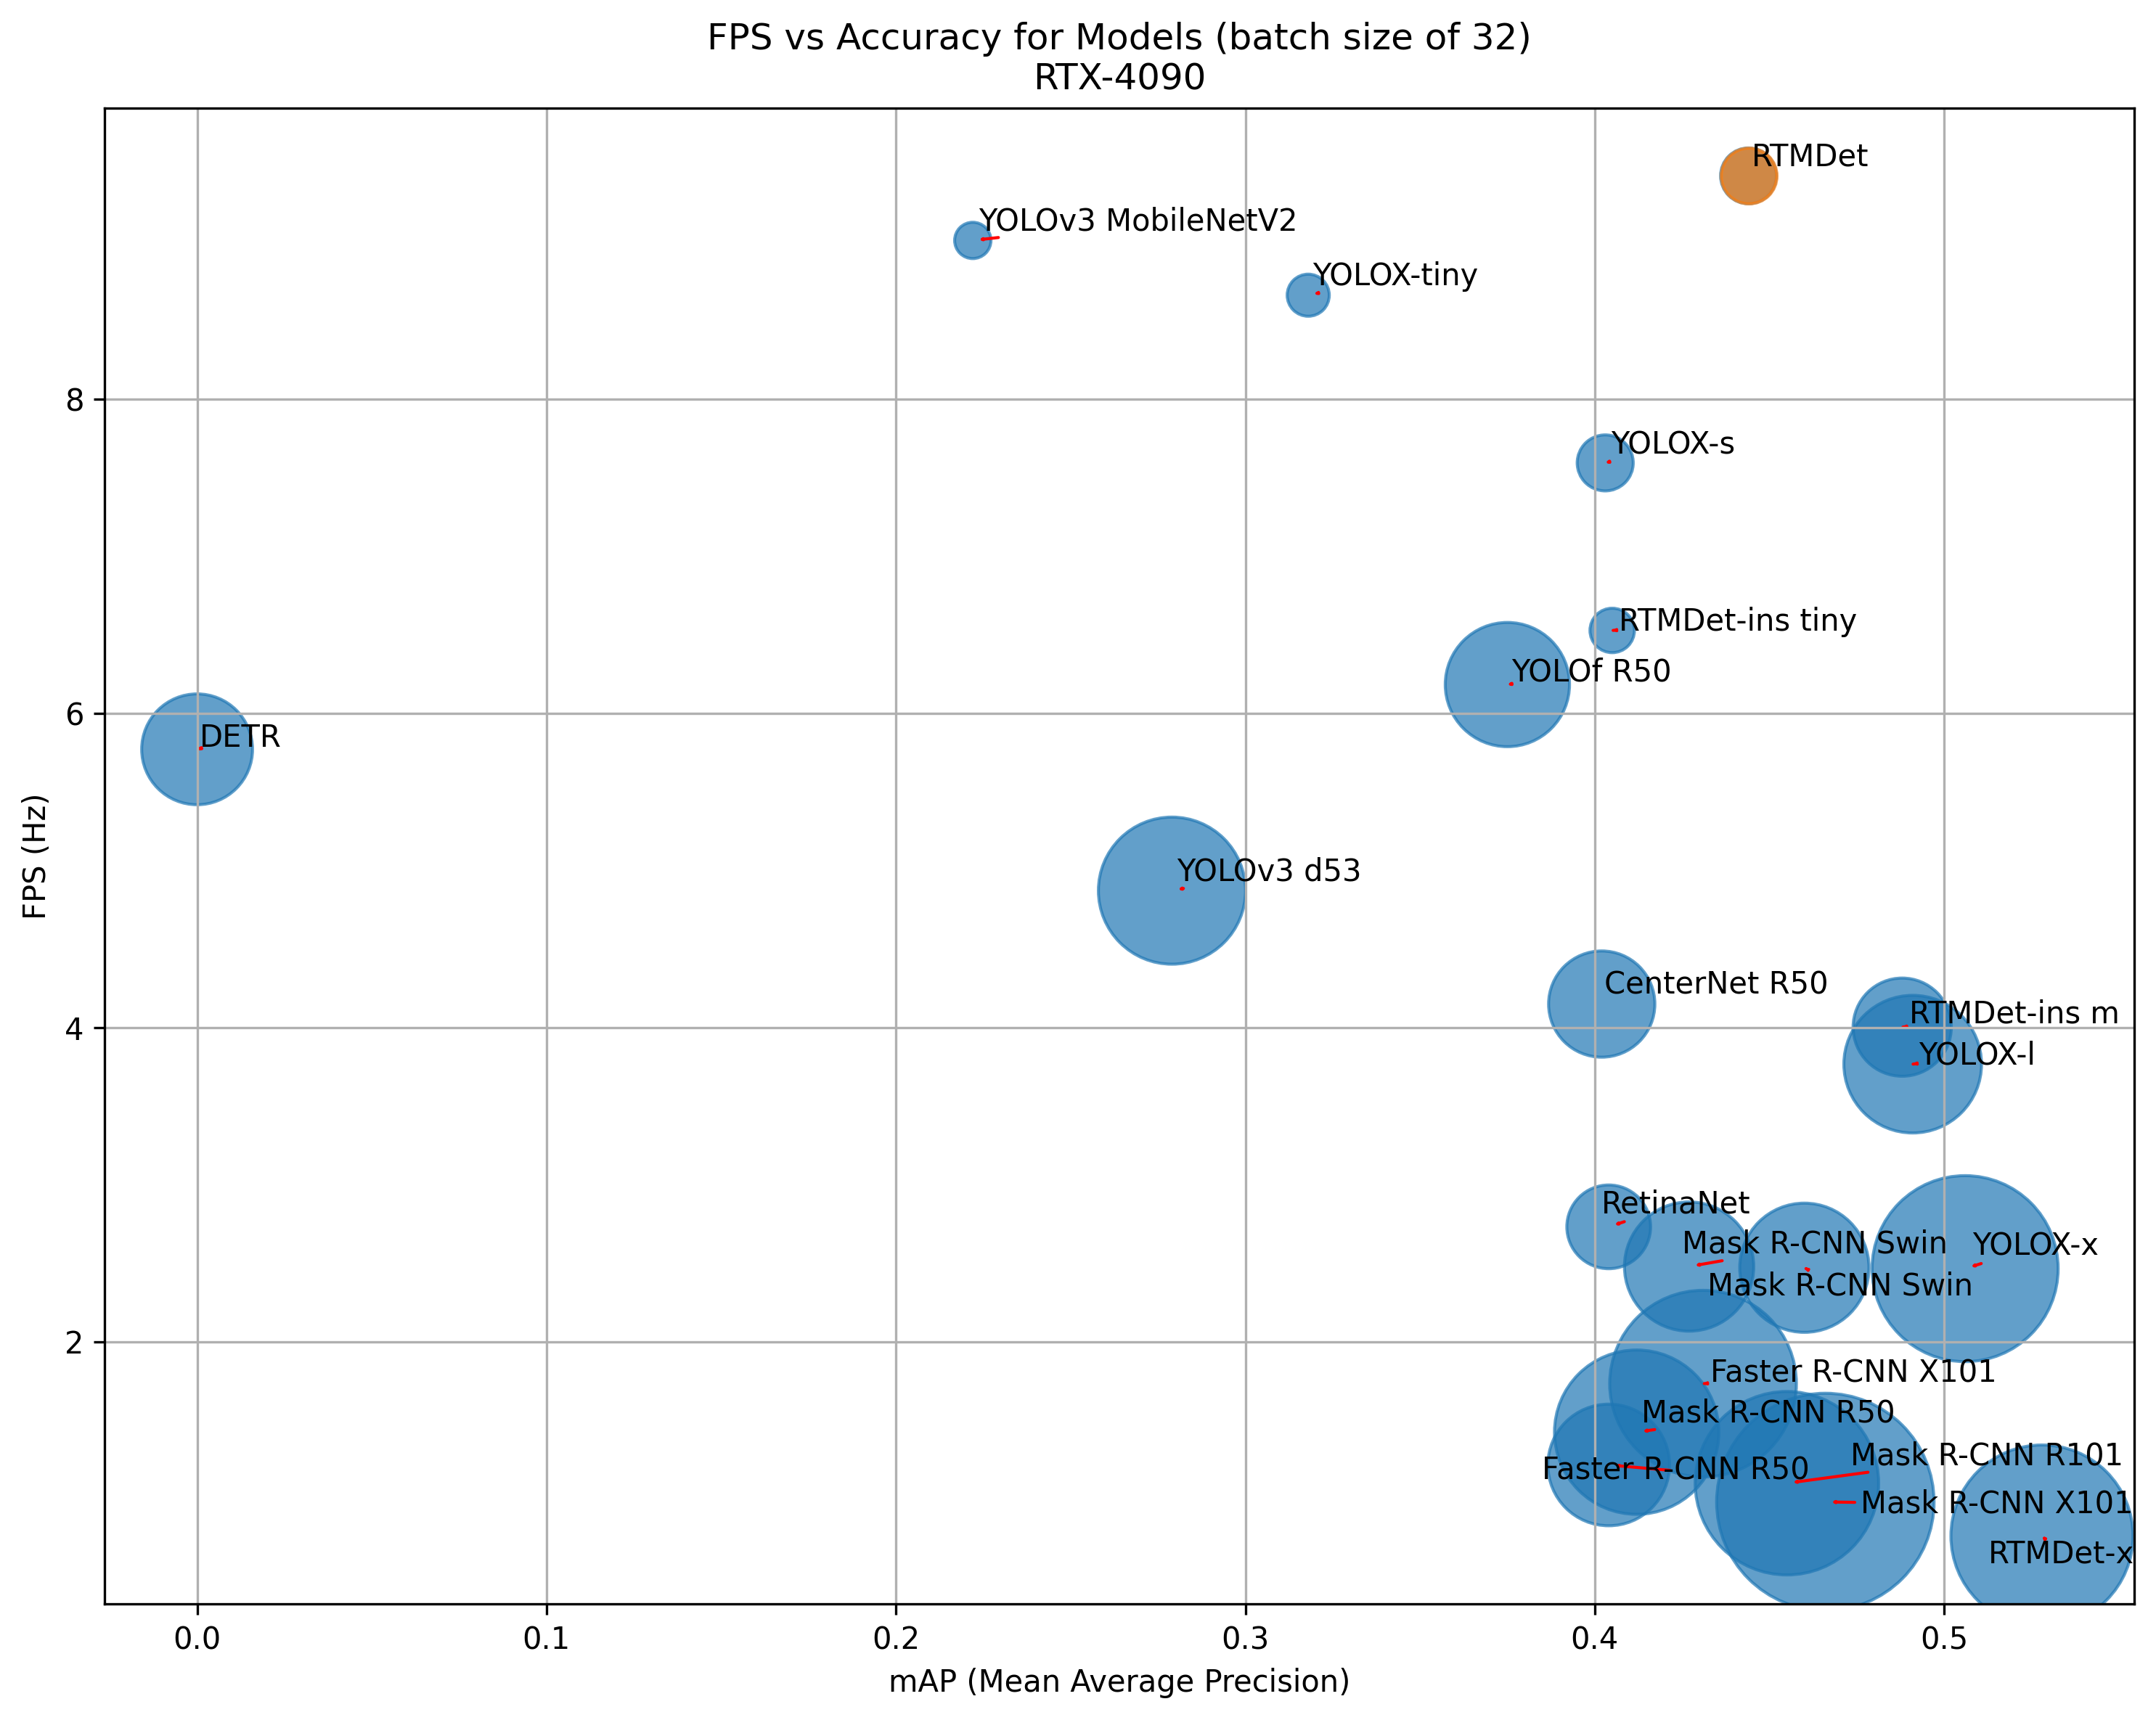

In [7]:
gpu = 'RTX-4090'
results = result_paths[gpu]

gpu.replace('_', ' ')

dfs = []
for r in results:
    if 'results/RTX-4090/vitdet_epoch_5.csv' == str(r):
        continue
    df = pd.read_csv(r)
    dfs.append(df)
combined_df = pd.concat(dfs, ignore_index=True)

batch_sizes = [1, 16, 32]

for batch_size in batch_sizes:
    time = f'Time_{batch_size}_mean'
    filtered = combined_df[combined_df[time] != -1]
    filtered_no_custom = filtered[filtered['config_file'] != 'config/vitdet.py']
    filtered_no_custom = filtered_no_custom[filtered_no_custom['config_file'] != 'config/rtmdet.py']
    custom = pd.concat([filtered[filtered['config_file'] == 'config/vitdet.py'],
                        filtered[filtered['config_file'] == 'config/rtmdet.py']], ignore_index=True)
    fps = 1.0 / filtered[time]

    plt.figure(figsize=(10, 8), dpi=300)
    plt.scatter(filtered['mAP'], fps, s=filtered['model_size (MB)'] * 10, alpha=0.7)
    if len(custom) > 0:
        print(custom['mAP'])
        plt.scatter(custom['mAP'],  1 / custom[time], s=custom['model_size (MB)'] * 10, alpha=0.7)

    plt.xlabel('mAP (Mean Average Precision)')
    plt.ylabel('FPS (Hz)')
    plt.title(f'FPS vs Accuracy for Models (batch size of {batch_size})\n{gpu}')
    plt.grid(True)
    plt.tight_layout()

    texts = []
    for i, row in filtered.iterrows():
        name = config_to_text[pathlib.Path(filtered['config_file'][i]).name]
        size = filtered['model_size (MB)'][i]

        # text = f'{name} ({size:.2f} MB)'
        text = f'{name}'
        x = filtered['mAP'][i]
        y = fps[i]

        texts.append(plt.text(x, y, text))
        # plt.annotate(text, (x, y), fontsize=8)
    adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=1))

    plt.show()

In [5]:
t = combined_df[combined_df['config_file'] == 'config/detr.py']['Time_1_mean']
print(1 / (t))

26    115.413495
Name: Time_1_mean, dtype: float64
